In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Features matrix

- two-dimensional numericl array or matrix -> features matrix
- called x
- shape : [n_samples, n_features]
- samples(rows) : individual objects
- features(columns) : distinct observations that describe each sample

### Target array
- one-dimensional
- called y
- shape : n_samples
- what we want to predict from data

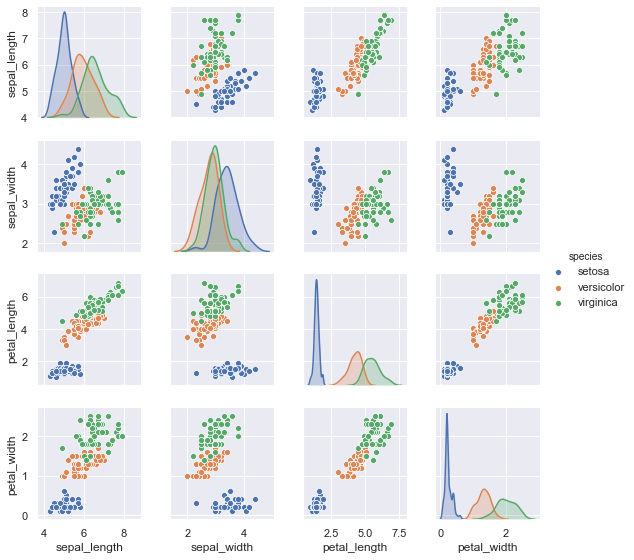

In [4]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=2);

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

# Scikit-Learn's Estimator API

# Supervised learning example : Simple linear regression

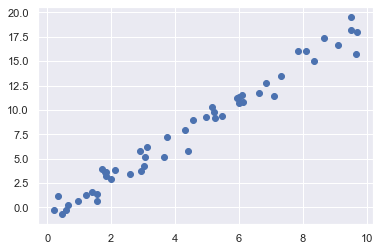

In [11]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

### 1. Choose a class of model

In [12]:
from sklearn.linear_model import LinearRegression

### 2. Choose model hyperparameters

- Would we like to fit for the offset (i.e., y-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

In [13]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 3. Arrange data into a features matrix and target vector

- two-dimensional features matrix + one-dimensional target array

In [15]:
X = x[:, np.newaxis]
X.shape

(50, 1)

### 4. Fit the model to your data

In [16]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# 기울기
model.coef_

array([1.9776566])

In [18]:
# intercept
model.intercept_

-0.9033107255311164

### 5. Predict labels for unknown data

In [19]:
xfit = np.linspace(-1, 11)

In [21]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

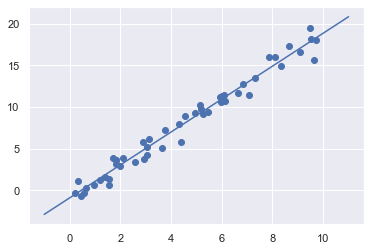

In [22]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

## Supervised learning example : Iris classification

In [24]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [25]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                        # 2. instantiate model
model.fit(Xtrain, ytrain)                   # 3. fit model to data
y_model = model.predict(Xtest)              # 4. predict on new data

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## Unsupervised learning example: Iris dimensionality

- The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data

- Often dimensionality reduction is used as an aid to visualizing data

In [27]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)             # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                       # 3. Fit to data. Notice y is not specified
X_2D = model.transform(X_iris)          # 4. Transform the data to two dimensions

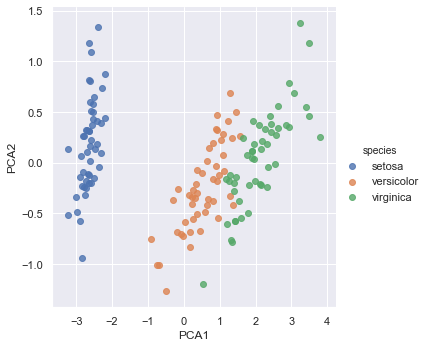

In [30]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False);

This indicates to us that a relatively straightforward classification will probably be effective on the dataset

## Unsupervised learning: Iris clustering

- use Gaussian mixture model

In [33]:
from sklearn.mixture import GaussianMixture # 1. Choose the model class
model = GaussianMixture(n_components=3, 
                        covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                            # 3. Fit to data. Notice y is not specified
y_gmm = model.predict(X_iris)                # 4. Determine cluster labels

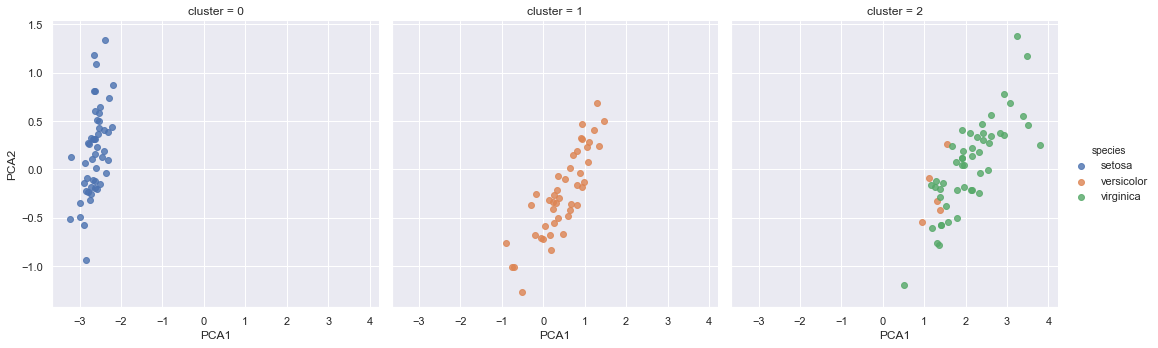

In [35]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', col='cluster', fit_reg=False);

# Application: Exploring Hand-written Digits

## Loading and visualizing the digits data

In [36]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

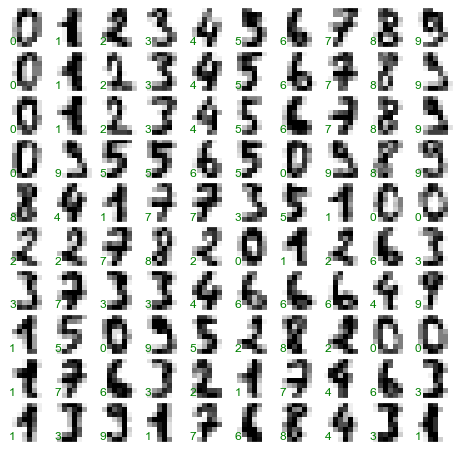

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [48]:
X = digits.data
X.shape

(1797, 64)

In [49]:
y = digits.target
y.shape

(1797,)

## Unsupervised learning : Dimensionality reduction

- We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize in such a high-dimensional space.
- Instead we'll reduce the dimension to 2

In [52]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

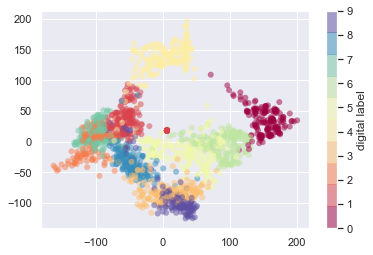

In [61]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none',
            alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digital label', ticks=range(10));

## Classification on digits

In [62]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [63]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

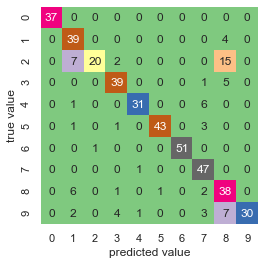

In [77]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap=plt.cm.Accent)
plt.xlabel('predicted value')
plt.ylabel('true value');

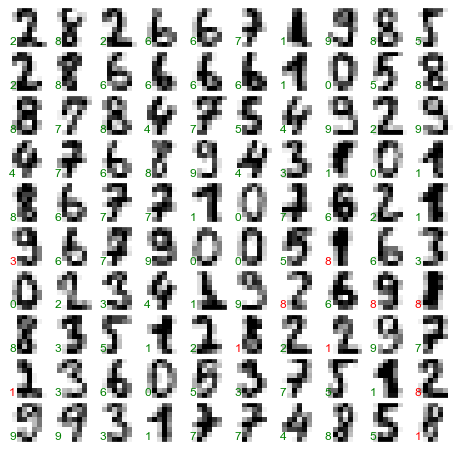

In [80]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')